In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from celluloid import Camera

## <b>BIO 230G Visualization Makeover 1 </b>
#### Data Source: https://data.world/makeovermonday/2021w28
#### Original Visualization: https://reports.opensafely.org/reports/vaccine-coverage/

In [3]:
DATA_SOURCE = 'covid_vaccine_coverage.csv'

ETHNICITIES = ['Black', 'Mixed', 'Other', 'South Asian', 'Unknown', 'White']
TOTALS      = [f'{e} total' for e in ETHNICITIES]
AGE_RANGE   = ['Age Range']

In [4]:
# All ages and all ethnicities
df_age_eth = pd.read_csv(DATA_SOURCE)

# All data for people 80+ years old
df_80 = df_age_eth[df_age_eth['Age Range'] == '80+']

df_80.head()

,Age Range,Covid Vacc Date,Black,Black total,Mixed,Mixed total,Other,Other total,South Asian,South Asian total,Unknown,Unknown total,White,White total
1004,80+,1/12/2020,0,10969,0,3234,0,6692,0,28056,0,58961,0,997885
1005,80+,8/12/2020,0,10969,0,3234,0,6692,0,28056,14,58961,518,997885
1006,80+,9/12/2020,0,10969,0,3234,21,6692,21,28056,56,58961,1876,997885
1007,80+,10/12/2020,7,10969,7,3234,35,6692,49,28056,112,58961,3661,997885
1008,80+,11/12/2020,14,10969,14,3234,42,6692,70,28056,161,58961,5362,997885


In [5]:
# Total number of people for all ethnicity categories
totals = df_80[TOTALS].to_numpy()

# Number of people 80+ that are vaccinated per ethnicity category
total_80_vax = df_80[ETHNICITIES].to_numpy()

# Number of people 80+ that remain unvaccinated per ethnicity category
diff = totals-total_80_vax

# Percentage of people 80+ that are vaccinated per ethnicity category
percentage_vax = np.round(total_80_vax/totals*100,0)

# Offset so that the plot is viewable as a half doughnut
offset = total_80_vax + diff

# Assign the dates to a variable
dates = df_80['Covid Vacc Date']

C:\Users\echaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


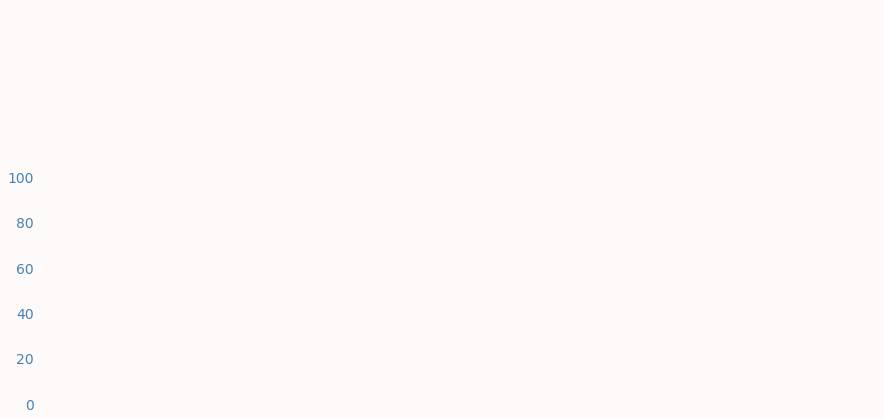

In [52]:
# Create the layout
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 6, figure=fig, height_ratios=[1, 0.55])
plt.subplots_adjust(hspace=-0.3)


# Set the animation object
camera = Camera(fig)

# Set the colors
colors     = [plt.cm.Set3(i) for i in range(len(ETHNICITIES))]
bg_color   = 'snow'
text_color = 'steelblue'
fig.patch.set_facecolor(bg_color)
b.set_facecolor(bg_color)

# Create the line plot
b = fig.add_subplot(gs[1, :])
b.tick_params(labelbottom=False, labelsize=14, bottom=False, left=False, labelcolor=text_color)
b.spines['top'].set_visible(False)
b.spines['right'].set_visible(False)
b.spines['bottom'].set_visible(False)
b.spines['left'].set_visible(False)

# Iterate over each date 
for date in range(1, dates.shape[0]):
    
    # Iterate through each ethnicity to plot the data
    for i in range(len(ETHNICITIES)):

        # Create an array of values for the pie chart
        vals = np.append(diff[date][i], [total_80_vax[date][i], offset[date][i]])

        # Create the percentage string
        percent = f'{int(percentage_vax[date][i])}%'

        # Plot the pie chart
        a = fig.add_subplot(gs[0,i])
        a.pie(vals, colors= ['whitesmoke', colors[i], 'white'], wedgeprops=dict(linewidth=3, edgecolor='w'));

        # Create the doughnut plot and add text
        circle = plt.Circle((0,0), 0.6, color=bg_color)
        rect   = plt.Rectangle((-50, 0), 100, -1.0, color=bg_color)
        txt    = plt.Text(text=percent, horizontalalignment='center', fontsize=20);
        txt_eth = plt.Text(text=ETHNICITIES[i], horizontalalignment='center', y=-0.5, fontsize=14, color=text_color);

        a.add_artist(circle)
        a.add_artist(rect)
        a.add_artist(txt);
        a.add_artist(txt_eth);
        
        b.set_ylim([0, percentage_vax[:date,i].max()+3])
        
        # plot the data on the line graph
        b.plot(dates[:date], percentage_vax[:date,i], color=colors[i], linewidth=2)
        b.set_facecolor(bg_color)

    # Draw the date on the line plot
    txt_date = plt.Text(text=dates.iloc[date], x=100, y=5, horizontalalignment='center', fontsize=20, color=text_color);
    b.add_artist(txt_date);
    
    # Set the title text
    plt.text(-13, -1.5, 'UK Covid Vaccination Percentage in 80+ Population', fontsize=18, color=text_color)
    
    camera.snap()

# Animate and save the gif
animation = camera.animate()
animation.save('visualization.gif', writer='imagemagick')
